# Prey-predator model

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator). 

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator. 



For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$

For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$

Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

***
<a id='parameters'>
    
## Task: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number
</a>

***
Add 1 to each digit and multiply by 2 and set this value to the parameters.

__alternatively: use $(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$__

## Solution to Task 1

In [1]:
# params=2,1,1,2
params=(8,2,12,2)

***
<a id='vectorfield'>
    
## Task: Plot the vector $\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in XY plane
</a>

***
From the this plot, qualitatively say what is the behaviour! 


Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; output will be the list $\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$
1. The x-range and y-range are to be determined by the steady state position determined in previous task. 
2. For plotting the arrows use the function `arrow(x,y,dx,dy)` to draw arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

## Solution to Task 2

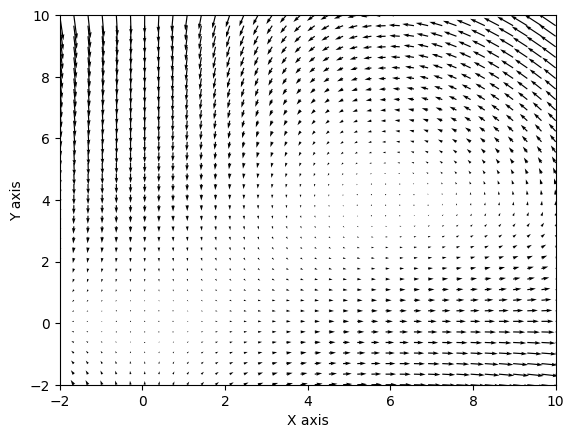

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def rate_vector(x, y, params):
    alpha, beta, gamma, delta = params

    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y

    return dx_dt, dy_dt

ranging = 10
part = 36
x_values = np.linspace(-2, ranging, part)
y_values = np.linspace(-2, ranging, part)
X, Y = np.meshgrid(x_values, y_values)

dx_dt, dy_dt = rate_vector(X, Y, params)
plt.quiver(X, Y, dx_dt, dy_dt)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()


We see that there is a trivial steady state at (0,0) and another steady state at (6,4) in this graph which it keeps circulating around for given initial values of predators. Qualitatively we see that the number of predators increases when there is more prey. The number of prey reduces when there are more predators.

***

***
<a id='steadystates'>
    
## Task: Find the steady states (where $\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$) by numerically solving the two coupled equations for the two unknowns $X,Y$ 
</a>

***

## Solution to Task 3

In [3]:
import scipy.optimize

In [30]:
from scipy.optimize import fsolve

def predator_prey_steady_states(variables, params):
    x, y = variables
    alpha, beta, gamma, delta = params

    eq1 = alpha * x - beta * x * y
    eq2 = delta * x * y - gamma * y

    return [eq1, eq2]

params = (8, 2, 12, 2)  
initial_guess1 = [2, 2]  
initial_guess2 = [10, 10]

ss1 = fsolve(predator_prey_steady_states, initial_guess1, args=(params,))
print("Steady state 1:", ss1)

ss2 = fsolve(predator_prey_steady_states, initial_guess2, args=(params,))
print("Steady states 2:", ss2)



Steady state 1: [0. 0.]
Steady states 2: [6. 4.]


In [31]:
print(ss1)

[0. 0.]


In [32]:
print(ss2)

[6. 4.]


Hence we see that the two steady states for these parameter values are (0,0) and (6,4)

***
<a id='timeevolution'>
    
## Task: Integrate the rate laws and find the evolution of system
</a>

***
Plot $X(t)$ and $Y(t)$ for some choosen values of $X(t=0)$ and $Y(t=0)$. And describe its behaviour in your own words. 

Hint: use `scipy.integrate.odeint` function

## Solution to Task 4

In [33]:
?scipy.integrate.odeint

Signature:
scipy.integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
        

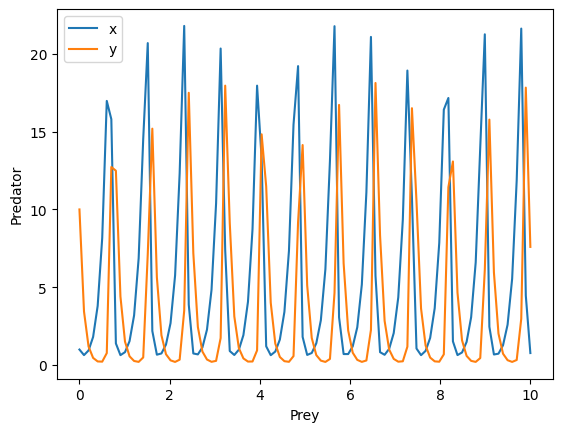

In [34]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_system(variables, t, params):
    x, y = variables
    alpha, beta, gamma, delta = params

    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y

    return [dx_dt, dy_dt]


params = (8, 2, 12, 2)

initial_conditions = [1, 10]

t = np.linspace(0, 10, 100)

solution = odeint(predator_prey_system, initial_conditions, t, args=(params,))

x_values = solution[:, 0]
y_values = solution[:, 1]

plt.plot(t, x_values, label='x')
plt.plot(t, y_values, label='y')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.legend()
plt.show()


As Described above we see from these two plots that the graph keeps circulating around the steady states for given initial values of predators. Qualitatively we see that the number of predators increases when there is more prey. The number of prey reduces when there are more predators. The peaks and troughs of these values keep following each other.

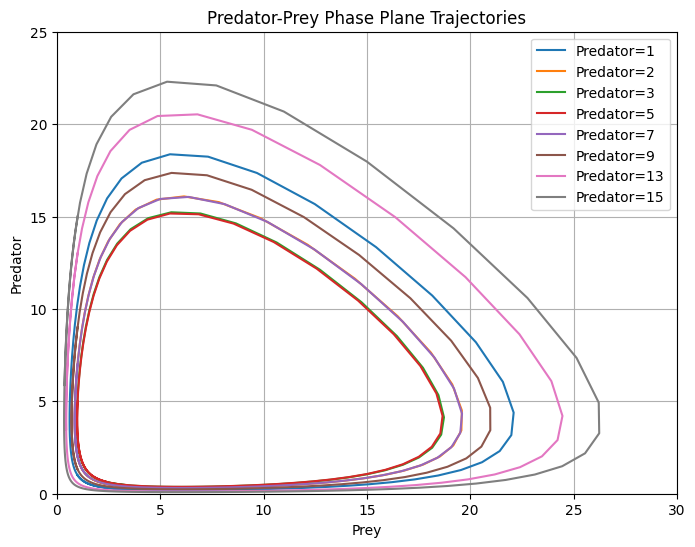

In [35]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


predator_values = (1, 2, 3, 5, 7, 9 , 13, 15)

t2=np.linspace(0,1,100)

plt.figure(figsize=(8, 6))
for predator in predator_values:
    initial_conditions = [1, predator]
    solution = odeint(predator_prey_system, initial_conditions, t2, args=(params,))
    x_values = solution[:, 0]
    y_values = solution[:, 1]
    plt.plot(x_values, y_values, label=f'Predator={predator}')

plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Predator-Prey Phase Plane Trajectories')
plt.xlim([0, 30])
plt.ylim([0, 25])
plt.legend()
plt.grid(True)
plt.show()


***
<a id='jacobian'>
    
## Task: Using SymPy, find the Jacobian (at any arbitrary point), and hence the Jacobian at steady state(/s)
</a>

***

## Solution to Task 5

In [36]:
import sympy

In [37]:
?rate_vector

Signature: rate_vector(x, y, params)
Docstring: <no docstring>
File:      /tmp/ipykernel_28399/2395574192.py
Type:      function

In [38]:
X=sympy.Symbol('x')
Y=sympy.Symbol('y')

In [39]:
params = (8, 2, 12, 2)
rateV = rate_vector(X, Y, params)


In [40]:
from sympy import symbols, Matrix

x, y = symbols('x y')
params = (8, 2, 12, 2)

rate_vector_expr = rate_vector(x, y, params)

dx_dt_dx = rate_vector_expr[0].diff(x)
dx_dt_dy = rate_vector_expr[0].diff(y)
dy_dt_dx = rate_vector_expr[1].diff(x)
dy_dt_dy = rate_vector_expr[1].diff(y)

jacobian = Matrix([[dx_dt_dx, dx_dt_dy], [dy_dt_dx, dy_dt_dy]])

print("Jacobian matrix:")
print(jacobian)

Jacobian matrix:
Matrix([[8 - 2*y, -2*x], [2*y, 2*x - 12]])


In [41]:
ss1

array([0., 0.])

In [42]:
ss2

array([6., 4.])

In [43]:
substituted_jacobian1 = jacobian.subs([(x, ss1[0]), (y, ss1[1])])
substituted_jacobian2 = jacobian.subs([(x, ss2[0]), (y, ss2[1])])

In [44]:
substituted_jacobian1

Matrix([
[8,   0],
[0, -12]])

In [45]:
substituted_jacobian2

Matrix([
[  0, -12.0],
[8.0,     0]])

In [46]:
eigenvalues1= substituted_jacobian1.eigenvals()
for eigenvalue, multiplicity in eigenvalues1.items():
    print(f"Eigenvalue: {eigenvalue}, Multiplicity: {multiplicity}")

Eigenvalue: 8, Multiplicity: 1
Eigenvalue: -12, Multiplicity: 1


In [47]:
eigenvalues2 = substituted_jacobian2.eigenvals()
for eigenvalue, multiplicity in eigenvalues2.items():
    print(f"Eigenvalue: {eigenvalue}, Multiplicity: {multiplicity}")

Eigenvalue: -9.79795897113271*I, Multiplicity: 1
Eigenvalue: 9.79795897113271*I, Multiplicity: 1


***
<a id='geometric'>
    
## Task: Geometric Interpretation of Matrix (through its operation on vectors)
</a>

***

## Solution to Task 6

One of the common operations is matrix operation on vector, and many of the times of specific interest is multiple repeated operations of matrix on vector. 

Consider $\textbf A$, an arbitrary $2\times 2$ matrix. For a arbirtary unit vector $\vec x$, plot $\textbf A \vec x$. From this plot, can you generalise the operation $\textbf A \vec x$.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_vector(v, color, label):
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

def plot_matrix_multiplication(A, theta):
    unit_vectors = np.array([[1, 0], [0, 1]])  

    for v in unit_vectors:
        Av = np.dot(A, v)
        plot_vector(v, 'blue', 'Unit Vector')
        plot_vector(Av, 'orange', 'Transformed Vector')

    theta_rad = math.radians(theta)
    unit_vector_theta = np.array([math.cos(theta_rad), math.sin(theta_rad)])
    transformed_vector_theta = np.dot(A, unit_vector_theta)
    plot_vector(unit_vector_theta, 'green', 'Unit Vector at Theta')
    plot_vector(transformed_vector_theta, 'red', 'Transformed Vector at Theta')

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Matrix Multiplication')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.show()

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))
d = float(input("Enter the value of d: "))

A = np.array([[a, b], [c, d]])

theta = float(input("Enter the value of theta in degrees: "))

plot_matrix_multiplication(A, theta)


ValueError: could not convert string to float: ''

We see that since this is matrix multiplication it corresponds to a linear transformation from a finite basis vector space to another finite basis vector space. Under such transformations the zero vector must be mapped to the zero vector and linear combinations must be preserved. Hence multiplication by a $2 x 2$ matrix on a unit vector in $R^2$ represents a rotation and a scaling without moving the origin.
***

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$. 

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$).

Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
Eigenvector 1: [-0.82456484  0.56576746]
Eigenvector 2: [-0.41597356 -0.90937671]
Unit vector x as a linear combination of orthogonal eigenvectors:
Coefficient 1: -0.1470429945331137
Ortho Eigenvector 1: [-0.82456484  0.56576746]

Coefficient 2: -0.9891301015330262
Ortho Eigenvector 2: [0.56576746 0.82456484]



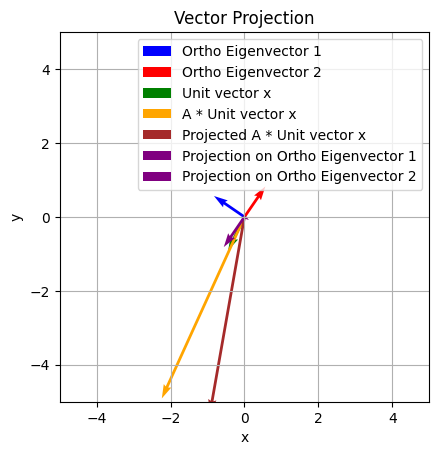

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(v, color, label):
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

def project_vector(v, eigenvectors):
    return np.dot(v, eigenvectors.T)

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))
d = float(input("Enter the value of d: "))
theta = float(input("Enter the value of theta in degrees: "))
theta_rad = np.radians(theta)

A = np.array([[a, b], [c, d]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
for i, eigenvector in enumerate(eigenvectors.T):
    print(f"Eigenvector {i+1}:", eigenvector)

Q, R = np.linalg.qr(eigenvectors)
ortho_eigenvectors = Q

unit_vector_theta = np.array([np.cos(theta_rad), np.sin(theta_rad)])

coefficients = np.dot(unit_vector_theta, ortho_eigenvectors)

print("Unit vector x as a linear combination of orthogonal eigenvectors:")
for i, eigenvector in enumerate(ortho_eigenvectors.T):
    print(f"Coefficient {i+1}:", coefficients[i])
    print(f"Ortho Eigenvector {i+1}:", eigenvector)
    print()

b_vector = np.dot(A, unit_vector_theta)
projected_b_vector = project_vector(b_vector, ortho_eigenvectors)

plt.quiver(0, 0, ortho_eigenvectors[0, 0], ortho_eigenvectors[1, 0], angles='xy', scale_units='xy', scale=1, color='blue', label='Ortho Eigenvector 1')
plt.quiver(0, 0, ortho_eigenvectors[0, 1], ortho_eigenvectors[1, 1], angles='xy', scale_units='xy', scale=1, color='red', label='Ortho Eigenvector 2')
plot_vector(unit_vector_theta, 'green', 'Unit vector x')
plot_vector(b_vector, 'orange', 'A * Unit vector x')
plot_vector(projected_b_vector, 'brown', 'Projected A * Unit vector x')

# Projection of unit_vector_theta onto the orthonormalized eigenvectors
projection = np.dot(unit_vector_theta, ortho_eigenvectors.T)
for i, eigenvector in enumerate(ortho_eigenvectors.T):
    plot_vector(projection[i] * eigenvector, 'purple', f'Projection on Ortho Eigenvector {i+1}')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Projection')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


Since we have represented these vectors in the form of a linear combination of the orthonormalized eigenvectors we see that the above statements are verified for k =1

***

## 
***
<a id='eigensystem'>
    
## Task: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors
</a>

***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.

## Solution to Task 7

In [50]:
params = (8, 2, 12, 2)
rateV = rate_vector(X, Y, *params)

x, y = symbols('x y')
params = (8, 2, 12, 2)

rate_vector_expr = rate_vector(x, y, *params)

dx_dt_dx = rate_vector_expr[0].diff(x)
dx_dt_dy = rate_vector_expr[0].diff(y)
dy_dt_dx = rate_vector_expr[1].diff(x)
dy_dt_dy = rate_vector_expr[1].diff(y)

jacobian = Matrix([[dx_dt_dx, dx_dt_dy], [dy_dt_dx, dy_dt_dy]])

print("Jacobian matrix:")
print(jacobian)

ss1
ss2

substituted_jacobian1 = jacobian.subs([(x, ss1[0]), (y, ss1[1])])
substituted_jacobian2 = jacobian.subs([(x, ss2[0]), (y, ss2[1])])

print(substituted_jacobian1)
print(substituted_jacobian2)

eigenvalues1= substituted_jacobian1.eigenvals()
for eigenvalue, multiplicity in eigenvalues1.items():
    print(f"Eigenvalue: {eigenvalue}, Multiplicity: {multiplicity}")
    
eigenvalues2 = substituted_jacobian2.eigenvals()
for eigenvalue, multiplicity in eigenvalues2.items():
    print(f"Eigenvalue: {eigenvalue}, Multiplicity: {multiplicity}")

TypeError: rate_vector() takes 3 positional arguments but 6 were given

From the graph it is clear that we have two steady states (6,4) and (0,0). The steady states (6,4) and (0,0) have different stability characteristics. The stability of a steady state in this system can be determined based on the eigenvalues of the system matrix.

For the steady state (6,4), the behavior of the system can be classified as follows:

- Stable Steady State: If all eigenvalues of the system matrix evaluated at (6,4) have negative real parts, the steady state is stable. This indicates that the populations of both the prey and predator tend to approach and remain at their respective values, and any disturbances or fluctuations will diminish over time.

- Unstable Steady State: If any eigenvalue of the system matrix has a positive real part, the steady state is unstable. In this case, the populations of the prey and predator diverge from the steady state, and even small perturbations can lead to significant changes in the dynamics of the system. Since one of our eigenvalues has a positive real part here, this is the case which will be followd.

For the steady state (0,0), the behavior of the system is also important This is an **unstable steady state**:

- Unstable Steady State: The steady state (0,0) is typically an unstable steady state in a prey-predator model. Since both the prey and predator populations are absent, any slight perturbations or introduction of prey or predators can cause the populations to increase and drive the system away from the steady state.

Stability analysis of dynamical systems, including prey-predator models, is essential for understanding the system's long-term dynamics and predicting its behavior under various conditions.